In [167]:
import os
from random import choice
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

### Предобработка данных и описание функций:

In [127]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

# процесс обучения
def learn(n, iters_count, w0, w1):
    w0 = w0.copy()
    w1 = w1.copy()
    # массив для ошибок, чтобы потом построить график
    errors = []
    for i in range(iters_count):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    return round(accuracy,2)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.as_matrix())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


# массив для ошибок, чтобы потом построить график
errors = []

### Обучение моделей, сбор данных:

In [ ]:
%%time

# Пространство параметров.
n_list = np.linspace(0,1,35).round(3)
iters_count_list = np.logspace(1, 5, 35).astype(int)


for j in range(10):
    results = {}
    
    # присваевание случайных весов
    w0_ = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1_ = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # Параметров 2, кол-во значений каждого 35, комбинаций 1225. Хочу посмотреть accuracy на всем пространстве
    # вариантов.
    # Считаться, видимо, это будет долго, поэтому чтобы можно было прерваться и посмотреть результаты, буду рандомить
    # комбинации, но чекать чтобы одни и те же не повторялись.
    for i in range(5000):
        n = choice(n_list)
        iters_count = choice(iters_count_list)
        accuracy = learn(n, iters_count, w0_, w1_)

        results[(n, iters_count)] = accuracy
        print(f'iter {i} with n={n}, iters_count={iters_count} done, accuracy: {accuracy}')

        if len(results) % 100 == 0:  # Дампим промежуточные результаты.
            with open(f'results_{j}.pickle', 'wb') as f:
                pickle.dump(results, f)
        
        # Заканчиваем если покрыли более 95% пространства параметров.
        if len(results) > 0.95 * 1225:
            with open(f'results_{j}.pickle', 'wb') as f:
                pickle.dump(results, f)
            break
        
        # Если результаты с такими параметрами уже есть - пропускаем.
        if results.get((n, iters_count), None):
            continue

### Более тонкое обучение в облаке параметров, выбранном на предыдущем этапе:

### Интерпретация результатов:

In [188]:
full_map = np.zeros((35, 35))
accurate_map = np.zeros((10, 10))

[file for file in os.listdir() if 'pickle' in file]

['results_0.pickle']

In [189]:
n_list = np.linspace(0,1,35).round(3)
n_list_dict = {}
for i in range(len(n_list)):
    n_list_dict[n_list[i]] = i

iters_count_list = np.logspace(1, 5, 35).astype(int)
iters_count_list_dict = {}
for i in range(len(iters_count_list)):
    iters_count_list_dict[iters_count_list[i]] = i


with open('results_0.pickle', 'rb') as f:
    results_ = pickle.load(f)

# Загружаем результаты обучений с разными значениями параметров.    
for result in results_.items():
    full_map[n_list_dict[result[0][0]], iters_count_list_dict[result[0][1]]] = result[1]
    

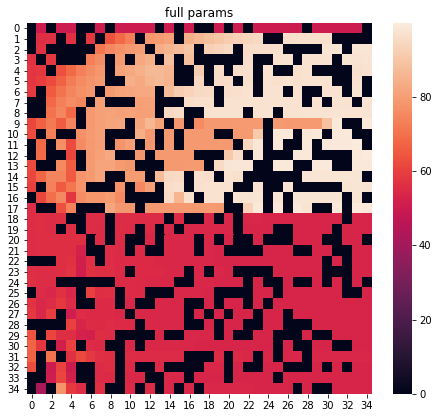

In [202]:
plt.figure(figsize=(17,15))

plt.subplot(2,2,1)
plt.title('full params')
sns.heatmap(full_map)

# plt.subplot(2,2,2)
# plt.title('accurate params')
# sns.heatmap(accurate_map)

### Выводы:

Посмотрел влияние показателей 'кол-во итераций обучения' и 'learning rate' на точность модели. Построил тепловую карту, где цвет - точность, на оси Y lerning rate, возрастающий сверху вниз, на оси X кол-во итераций, возрастающий слева направо.

Можно сделать следующие выводы:

* Кол-во итераций увеличивает время на обучение (это не из тепловой карты, это из эмпирических наблюдений) - ну и это логично и предсказуемо.

* При learning_rate больше 0,5 особо ловить нечего, слишком большой шаг чтобы обучать модель, разве что на совсем малом кол-ве итераций модель показывает какие-то нерандомные результаты, в принципе этот эффект можно использовать для каких-то целей где надо быстро прикидочно обучить модель при каких-то переборах или типа того. Но качество в этом случае не будет отличаться от качества при том же кол-ве итераций и при низком learning rate, так что смысла использовать большой learning rate нет. В данном пункте речь идет о крайне левой нижней и верхней части тепловой карты.

* При learning rate меньше 0,5 качество модели растет с ростом кол-ва итераций (шкала X, имеет логарифмический масштаб). Количество итераций увеличивает качество модели. Ну и, понятно, даже на логарифмической шкале прирост от каждого последующего логарифмического шага дает все меньший прирост.

* Таким образом можно сделать вывод, что нейросеть данного типа (с данными представленной сложности и расзмерности) не склонна к переобучению с ростом числа итераций и кол-вот итераций следует определять в соответствием от "стоимости" прироста качества, т.е. каждый последующий равный шаг прироста качества с точки зрения вычислительных и временных затра обходится все дороже и в какой-то момент эти затраты превышают условную ценность прироста качества, к которому они могут приводить, на это следует ориентироваться при выборе значения данного показателя.
